Essential Purpose:

Skills tested:
Using Pandas to access and explore the dataset.
Using Pandas to clean unwanted columns.
Using Scikit-Learn to preprocess the data before training.
Using the KNN classifier in classifying and testing the data.
Deciding the best model based on the classification metrics from your training.

Description
After the successful delivery of the first part of the Breast Cancer Campaign, the company wants to implement a simple classification model that would classify the diagnosis for a patient based on the same features collected from the Wisconsin Breast Cancer dataset.

You are required to:
Select the most important features in the Breast Cancer dataset.
Train multiple classifiers on the dataset to predict the diagnosis class.
Achieve an acceptable accuracy score.
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a Git push operation.


# Reading the Dataset
Load the previously preprocessed dataset saved in the CSV file “data_refined.csv” into a Pandas DataFrame.
Hint: make sure you completed the accumulative project for Module 1.

In [1]:
import pandas as pd 
df=pd.read_csv('data_refined.csv')
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave_points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.660820,1.148757,0.907083,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,0.260162,-0.805450,-0.099444,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,1.424827,0.237036,0.293559,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,1.115007,4.732680,2.047511,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,1.144205,-0.361092,0.499328,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [2]:
df.describe()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,concave_points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.372583,-1.373633e-16,7.492542e-17,-8.116921e-16,1.873136e-16,4.995028e-17,-3.746271e-17,1.748260e-16,4.838933e-16,2.247763e-16,...,0.000000,9.990056e-17,6.243785e-18,1.248757e-17,-2.247763e-16,-3.496520e-16,7.492542e-17,2.497514e-16,2.747265e-16,-5.619407e-16
std,0.483918,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,0.000000,-2.029648e+00,-2.229249e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,...,-1.913447,-1.532890e+00,-1.096968e+00,-2.223994e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,0.000000,-6.893853e-01,-7.259631e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,...,-0.674490,-6.516807e-01,-5.851185e-01,-7.486293e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,0.000000,-2.150816e-01,-1.046362e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,...,-0.140496,-2.194304e-01,-2.299405e-01,-4.351564e-02,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,1.000000,4.693926e-01,5.841756e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,...,0.472657,3.556925e-01,2.886421e-01,6.583411e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,1.000000,3.971288e+00,4.651889e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,...,6.649601,7.071917e+00,9.851593e+00,3.885905e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


# Feature Selection
Choosing only the most important features for training your classifier is one of the most important steps of the machine learning process. This can be done in many ways.
One of the simplest approaches is choosing the features with the highest correlation to the target data.
The label in this case is the ‘Diagnosed’ column.

The Diagnosed column has two distinct values:
M: Malignant Tumor
B: Benign Tumor

Calculate the correlation of all the features to their target labels.
Choose the most correlated features above a certain limit for training.
Output a list of important feature names.

In [3]:
from sklearn.preprocessing import LabelEncoder
df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])

<AxesSubplot:>

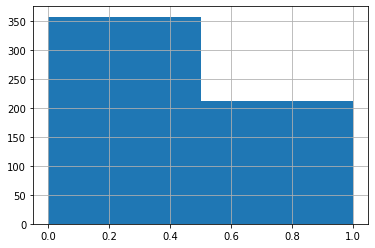

In [4]:
import matplotlib.pyplot as plt
df["diagnosis"].hist(bins=2)

<AxesSubplot:>

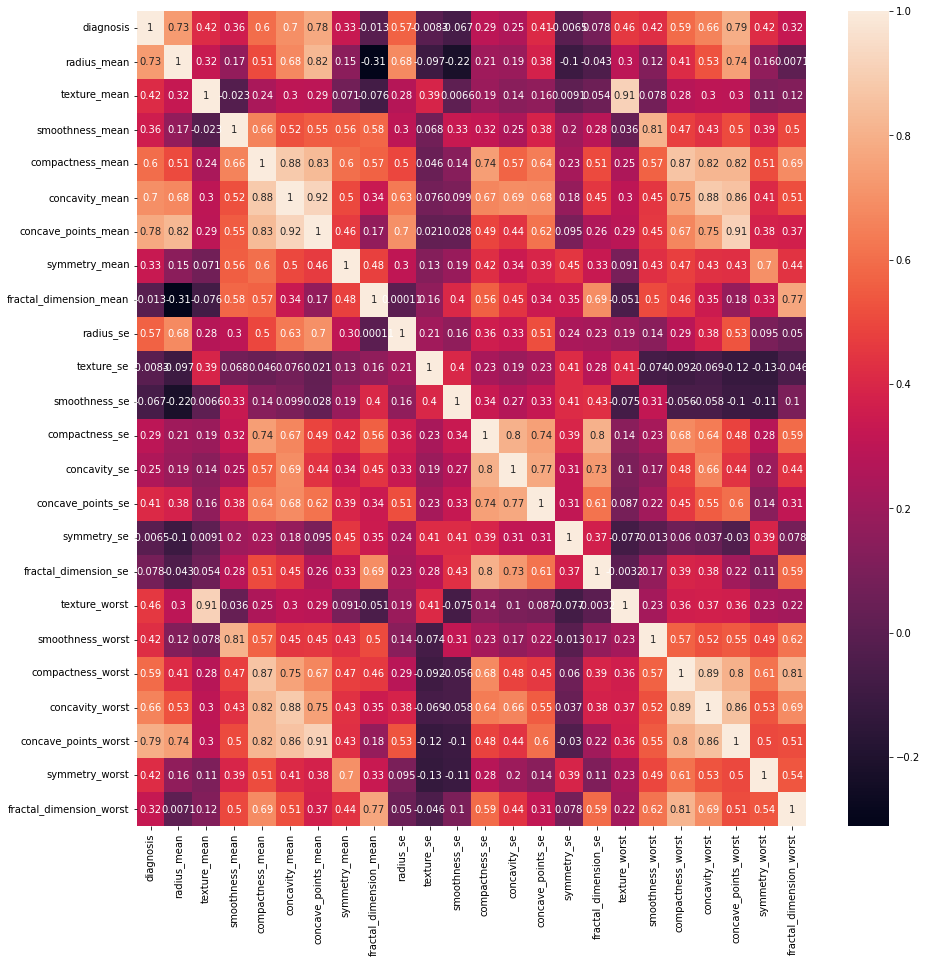

In [5]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [6]:
# find column names where correlation with diagnosis is greater than 0.3
newvals=df.corr().diagnosis.loc[df.corr().diagnosis >= 0.3]
newvals.index

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave_points_mean',
       'symmetry_mean', 'radius_se', 'concave_points_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<AxesSubplot:>

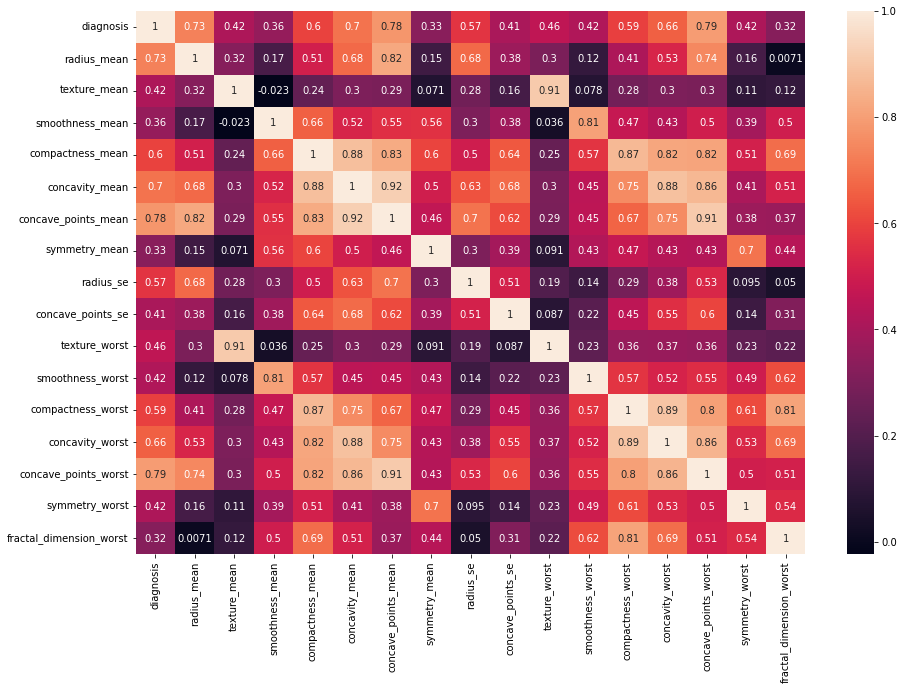

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[newvals.index].corr(), annot=True)

In [8]:
cancer1=df[newvals.index]
cancer1.head(5)

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,radius_se,concave_points_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.489734,0.660820,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,0.499255,0.260162,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,1.228676,1.424827,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,0.326373,1.115007,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,1.270543,1.144205,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [9]:
y=cancer1["diagnosis"].values
X_columns = len(cancer1.columns)
X=cancer1.iloc[:,1:X_columns].values

# Splitting the Data
Split your data as follows:
80% training set
10% validation set
10% test set

# Test features split

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0) 

In [12]:
#check to make sure it's split correctly 
print(len(X_train), len(X_test), len(X_validate))

455 57 57


# FULL features split

In [13]:
X_columns_full = len(df.columns)
X_full=df.iloc[:,1:X_columns].values

In [14]:
from sklearn.model_selection import train_test_split 
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size = 0.2, random_state = 0)

In [15]:
X_validate_full, X_test_full, y_validate_full, y_test_full = train_test_split(X_test_full, y_test_full, test_size = 0.5, random_state = 0) 

In [16]:
#check to make sure it's split correctly 
print(len(X_train_full), len(X_test_full), len(X_validate_full))

455 57 57


# Training Classifiers
Use KNN classifier, random forest classifier, and support vector classifier (SVC) models to train your data.
Train your full features dataset and your reduced set features dataset.
Get accuracy scores and confusion matrices for both. You need a minimum accuracy score of 94%.

Compare the results.
Hint: you need to choose the optimal value for k using cross validation.

#  KNN classifier - reduced set features

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
scores=[]
neighbors=range(1,20)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    results = knn.score(X_test, y_test)
    scores.append(results)

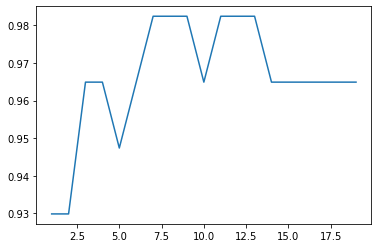

In [19]:
plt.plot(neighbors, scores)

In [20]:
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)
knn.score(X_test, y_test)

0.9824561403508771

In [21]:
#print the accuracy score of your final classifier 
result = knn.score(X_validate, y_validate)
print("Accuracy =", result)

Accuracy = 0.9649122807017544


In [22]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix

predictions = knn.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate, predictions))

Confusion Matrix: 
 [[35  0]
 [ 2 20]]


# KNN - Full features

In [23]:
scores=[]
neighbors=range(1,20)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_full, y_train_full)
    results = knn.score(X_test_full, y_test_full)
    scores.append(results)

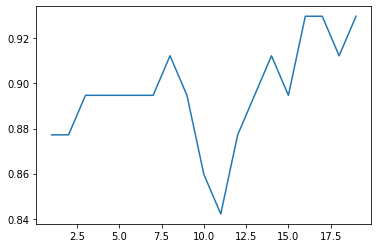

In [24]:
plt.plot(neighbors, scores)

In [25]:
# k = 2 or 4
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train_full, y_train_full)
knn.score(X_test_full, y_test_full)

0.8947368421052632

In [26]:
#print the accuracy score of your final classifier 
result = knn.score(X_validate_full, y_validate_full)
print("Accuracy =", result)

Accuracy = 0.9473684210526315


In [27]:
predictions_full = knn.predict(X_validate_full)
print("Confusion Matrix: \n",confusion_matrix(y_validate_full, predictions_full))

Confusion Matrix: 
 [[34  1]
 [ 2 20]]


# Random forest classifier - selected features

In [28]:
from sklearn.ensemble import RandomForestClassifier 

In [29]:
scores=[]
n_estimators=range(1,30)

for i in n_estimators:
    rfc = RandomForestClassifier(n_estimators = i, criterion="entropy").fit(X_train, y_train)
    results = rfc.score(X_test, y_test)
    scores.append(results)

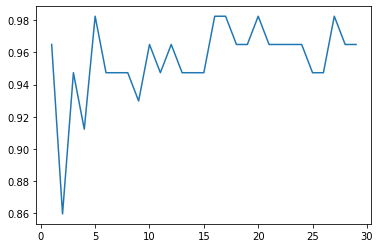

In [30]:
plt.plot(n_estimators, scores)

In [31]:
RFC = RandomForestClassifier(n_estimators=10, criterion="entropy")
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

In [32]:
#print the accuracy score of your final classifier 
result = RFC.score(X_validate, y_validate)
print("Accuracy =", result)

Accuracy = 0.9649122807017544


In [33]:
#print the confusion matrix
from sklearn.metrics import confusion_matrix

predictions = RFC.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate, predictions))

Confusion Matrix: 
 [[35  0]
 [ 2 20]]


# random forest - all features

In [34]:
scores=[]
n_estimators=range(1,40)

for i in n_estimators:
    rfc = RandomForestClassifier(n_estimators = i, criterion="entropy").fit(X_train_full, y_train_full)
    results = rfc.score(X_test_full, y_test_full)
    scores.append(results)

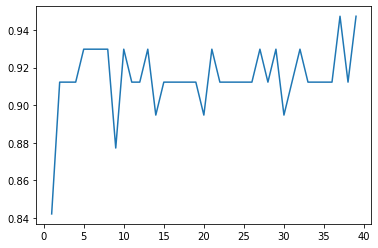

In [35]:
plt.plot(n_estimators, scores)

In [36]:
RFC = RandomForestClassifier(n_estimators=15, criterion="entropy")
RFC.fit(X_train_full, y_train_full)
y_pred = RFC.predict(X_test_full)

In [37]:
#print the accuracy score of your final classifier 
result = RFC.score(X_validate_full, y_validate_full)
print("Accuracy =", result)

Accuracy = 0.9649122807017544


In [38]:
#print the confusion matrix
predictions = RFC.predict(X_validate_full)
print("Confusion Matrix: \n",confusion_matrix(y_validate_full, predictions))

Confusion Matrix: 
 [[34  1]
 [ 1 21]]


# SVC - reduced set features 

In [39]:
from sklearn.svm import SVC

In [40]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
   
y_pred = classifier.predict(X_test)

In [41]:
#print the accuracy score of your final classifier 
result = classifier.score(X_validate, y_validate)
print("Accuracy =", result)

Accuracy = 0.9649122807017544


In [42]:
#print the confusion matrix
predictions = classifier.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate, predictions))

Confusion Matrix: 
 [[34  1]
 [ 1 21]]


# SVC - full features

In [43]:
classifier = SVC(kernel='linear')
classifier.fit(X_train_full, y_train_full)
   
y_pred = classifier.predict(X_test_full)

In [44]:
#print the accuracy score of your final classifier 
result = classifier.score(X_validate_full, y_validate_full)
print("Accuracy =", result)

Accuracy = 0.9649122807017544


In [45]:
#print the confusion matrix
predictions = classifier.predict(X_validate_full)
print("Confusion Matrix: \n",confusion_matrix(y_validate_full, predictions))

Confusion Matrix: 
 [[34  1]
 [ 1 21]]


# Challenge Yourself
Find another way to reduce the set of features.
Implement your classification using the new reduced set of features.

# another way to select features is to remove ones with a low correlation and redundant ones (threshold = 0.75)


In [46]:
cancer2=df[['diagnosis', 'symmetry_mean', 'radius_se', 'concavity_se', 
                'texture_worst','smoothness_worst','concave_points_worst', 
                'symmetry_worst', 'fractal_dimension_worst']]

In [47]:
y=cancer2["diagnosis"].values
X_columns = len(cancer2.columns)
X=cancer2.iloc[:,1:X_columns].values

In [48]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0) 

In [49]:
# KNN classifier
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)
knn.score(X_test, y_test)
result = knn.score(X_validate, y_validate)
print("Accuracy =", result)
predictions = knn.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate, predictions))

Accuracy = 0.9298245614035088
Confusion Matrix: 
 [[35  0]
 [ 4 18]]


In [50]:
#random forest classifier
RFC = RandomForestClassifier(n_estimators=10, criterion="entropy")
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
result = RFC.score(X_validate, y_validate)
print("Accuracy =", result)
predictions = RFC.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate, predictions))

Accuracy = 0.9473684210526315
Confusion Matrix: 
 [[34  1]
 [ 2 20]]


In [51]:
#SVC classifier
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
result = classifier.score(X_validate, y_validate)
print("Accuracy =", result)
predictions = classifier.predict(X_validate)
print("Confusion Matrix: \n",confusion_matrix(y_validate, predictions))

Accuracy = 0.9649122807017544
Confusion Matrix: 
 [[35  0]
 [ 2 20]]


# Submit your Mini Project. 
This step is optional but highly recommended. To have your mini project graded go to the questionnaire.